In [31]:
import numpy as np
from scipy.linalg import expm
import scipy
import matplotlib.pyplot as plt
import time

In [32]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [33]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [34]:
# Values = [10, 7, 5]
# Weights = [2, 4, 3]
# Ancil = [1, 2, 3]
# correct solution should be 110111 = 55
# Values = [10, 5]
# Weights = [2, 3]
# Ancil = [1, 2]
Values = [9, 7]
Weights = [2, 4]
Ancil = [1, 2, 2]
num_dimension = 2**(len(Values) + len(Ancil))

alpha = 26.34314250004425
beta = 88.2211083047426
gamma = max(Values) + 1
T = 1
dt = 0.01
t_axis = np.arange(0, T, dt)[0:]

In [35]:
# Create creation operator
a_dag = np.zeros((num_dimension, num_dimension))
n_indices = np.arange(num_dimension - 1)
a_dag[n_indices + 1, n_indices] = np.sqrt(n_indices + 1)
# print(a_dag)

# Create annihilation operator
a = np.zeros((num_dimension, num_dimension))
n_indices = np.arange(1, num_dimension)
a[n_indices - 1, n_indices] = np.sqrt(n_indices)
# print(a)

# print(a_dag @ a)

In [36]:
H0 = a_dag + a
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-10.077422674229464
[-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.     0.
 -0.     0.    -0.     0.    -0.001  0.002 -0.004  0.008 -0.014  0.026
 -0.045  0.072 -0.112  0.165 -0.229  0.301 -0.37   0.422 -0.44   0.409
 -0.32   0.177]


In [37]:
eyes = [sigmaI for _ in range(len(Values) + len(Ancil))]
profit_matrix = np.zeros((num_dimension, num_dimension))
weight_matrix = np.zeros((num_dimension, num_dimension))
penalty_matrix = np.zeros((num_dimension, num_dimension))

for i in range(len(Values)):
    nose = eyes.copy()
    nose[i] = sigmaBin
    tensorproduct = nose[0]
    for sigma in nose[1:]:
        tensorproduct = np.kron(tensorproduct, sigma)
    profit_matrix += Values[i] * tensorproduct
    weight_matrix += Weights[i] * tensorproduct
    
for j in range(len(Ancil)):
    nose = eyes.copy()
    nose[j + len(Values)] = sigmaBin
    tensorproduct = nose[0]
    for sigma in nose[1:]:
        tensorproduct = np.kron(tensorproduct, sigma)
    penalty_matrix += Ancil[j] * tensorproduct

Hp = -profit_matrix + gamma * (weight_matrix - penalty_matrix)**2

# for row in Hp:
#     print(row)


eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-9.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
def H(t, T=1, alpha=1, beta=1):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

In [39]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

In [40]:
# alpha_list = np.power(2, np.arange(1, 10, 1))
# print(alpha_list)
# accuracy_list = []

# for alpha in alpha_list:
#     start_time = time.time()

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
#     accuracy_list.append(accuracy)

#     end_time = time.time()
#     # print(f"alpha = {alpha}, loop time: {end_time - start_time}")

In [41]:
# beta_list = np.arange(1e-1, 1e1, 1e-1)
# accuracy_list = []

# for beta in beta_list:
#     # start_time = time.time()

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, T=T, alpha=alpha, beta=beta) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
#     accuracy_list.append(accuracy)

#     # end_time = time.time()
#     # print(f"alpha = {alpha}, loop time: {end_time - start_time}")



In [42]:
# print(accuracy_list)

In [43]:
# plt.scatter(alpha_list, accuracy_list, s=1)
# plt.xlabel("alpha")
# plt.ylabel("accuracy")
# print(max(accuracy_list))

In [44]:
# alpha_list = np.power(2, np.arange(10, 20, 1))
# print(alpha_list)
# accuracy_list = []

# for alpha in alpha_list:
#     start_time = time.time()

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
#     accuracy_list.append(accuracy)

#     end_time = time.time()
#     # print(f"alpha = {alpha}, loop time: {end_time - start_time}")

# print(accuracy_list)
# plt.scatter(alpha_list, accuracy_list, s=1)
# plt.xlabel("alpha")
# plt.ylabel("accuracy")
# print(max(accuracy_list))

In [45]:
# T_list = np.power(1.5, np.arange(0, 10, 1))
# accuracy_list = []

# for T in T_list:
#     start_time = time.time()

#     t_axis = np.arange(0, T, dt)

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
#     accuracy_list.append(accuracy)

#     end_time = time.time()
#     # print(f"T = {T}, loop time: {end_time - start_time}")

# print(accuracy_list)
# plt.scatter(T_list, accuracy_list, s=1)
# plt.xlabel("T_max")
# plt.ylabel("accuracy")
# print(max(accuracy_list))

In [46]:
# alpha_list = np.power(1.5, np.arange(0, 10, 1))
# beta = 1
# T = 1
# accuracy_list = []

# for alpha in alpha_list:
#     start_time = time.time()

#     t_axis = np.arange(0, T, dt)

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
#     accuracy_list.append(accuracy)

#     end_time = time.time()
#     # print(f"T = {T}, loop time: {end_time - start_time}")

# print(accuracy_list)
# plt.scatter(T_list, accuracy_list, s=1)
# plt.xlabel("alpha")
# plt.ylabel("accuracy")
# print(max(accuracy_list))

[     1     10    100   1000  10000 100000]
[np.float64(0.029174396961008736), np.float64(0.43569790175440926), np.float64(0.30052715830099813), np.float64(0.3575708400542768), np.float64(0.4827794723452166), np.float64(0.4704323993609078)]
0.4827794723452166


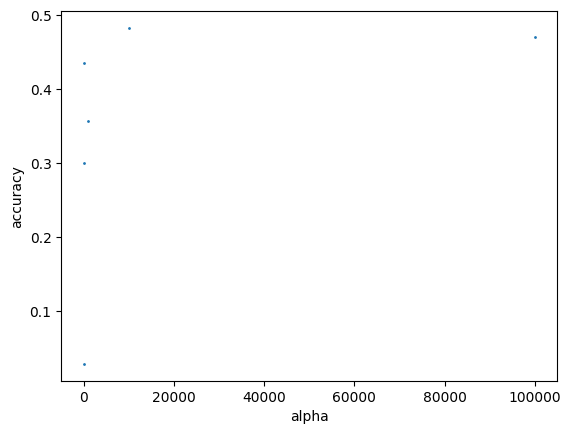

In [48]:
alpha_list = np.power(10, np.arange(0, 6, 1))
beta = 88.2211083047426
T = 1
print(alpha_list)
accuracy_list = []

for alpha in alpha_list:
    start_time = time.time()

    junrui_unitary = np.identity(len(H0))
    for t in t_axis:
        junrui_unitary = expm(-1j * H(t, alpha=alpha, beta=beta, T=T) * dt) @ junrui_unitary

    psi_final = junrui_unitary @ psi_ini

    accuracy = np.abs( np.dot(psi_correct, psi_final) )**2
    accuracy_list.append(accuracy)

    end_time = time.time()
    # print(f"alpha = {alpha}, loop time: {end_time - start_time}")

print(accuracy_list)
plt.scatter(alpha_list, accuracy_list, s=1)
plt.xlabel("alpha")
plt.ylabel("accuracy")
print(max(accuracy_list))